In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_pickle('1639398894.test_baa.pickle')
df

,id,with_low_rank,strategy,num_qubits,depth,cnots,entganglement,entganglement (MW),max_fidelity_loss,total_saved_cnots,...,real_cnots_no_approx,real_depth,real_depth_no_approx,real_fidelity_loss,real_fidelity_loss_benchmark,duration,approximation_miscalculation,real_approximation_miscalculation,benchmark_fidelity_loss_fail,saved_cnots_miscalculation
0,0,False,brute_force,7,35,151,0.844138,0.959305,0.1,0,...,151,363,363,-0.0000,-0.0,2.308034,False,False,False,False
1,0,False,greedy,7,35,151,0.844138,0.959305,0.1,0,...,151,363,363,-0.0000,-0.0,2.414019,False,False,False,False
2,0,True,brute_force,7,35,151,0.844138,0.959305,0.1,-2,...,151,469,363,-0.0000,-0.0,3.818133,False,False,False,False
3,0,True,greedy,7,35,151,0.844138,0.959305,0.1,-2,...,151,469,363,-0.0000,-0.0,4.743485,False,False,False,False
4,0,False,brute_force,7,35,151,0.844138,0.959305,0.2,0,...,151,363,363,-0.0000,-0.0,3.423267,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,99,True,greedy,7,35,151,0.868547,0.971132,0.9,151,...,150,2,360,0.8725,-0.0,0.203998,False,False,False,False
3996,99,False,brute_force,7,35,151,0.868547,0.971132,1.0,151,...,150,2,360,0.8725,-0.0,0.154682,False,False,False,False
3997,99,False,greedy,7,35,151,0.868547,0.971132,1.0,151,...,150,2,360,0.8806,-0.0,0.198338,False,False,False,False
3998,99,True,brute_force,7,35,151,0.868547,0.971132,1.0,151,...,150,2,360,0.8806,-0.0,0.231916,False,False,False,False


In [41]:
df['real_cnots_norm'] = df['real_cnots'] / df['real_cnots_no_approx']

count    4000.000000
mean        0.332543
std         0.365497
min         0.000000
25%         0.020000
50%         0.206667
75%         0.556291
max         1.013333
Name: real_cnots_norm, dtype: float64

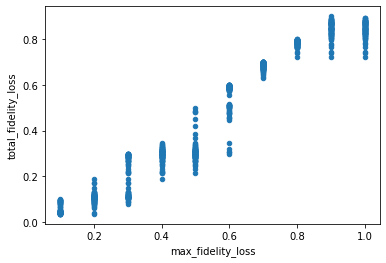

In [44]:
df[(df.strategy == 'brute_force') & df.with_low_rank].plot.scatter(x='max_fidelity_loss', y='total_fidelity_loss')
df['real_cnots_norm'].describe()

38      (0.826, 0.862]
78      (0.862, 0.897]
118     (0.826, 0.862]
158      (0.72, 0.755]
198     (0.826, 0.862]
             ...      
3838    (0.791, 0.826]
3878    (0.826, 0.862]
3918    (0.826, 0.862]
3958    (0.791, 0.826]
3998    (0.862, 0.897]
Name: entganglement, Length: 100, dtype: category
Categories (5, interval[float64, right]): [(0.72, 0.755] < (0.755, 0.791] < (0.791, 0.826] < (0.826, 0.862] < (0.862, 0.897]]

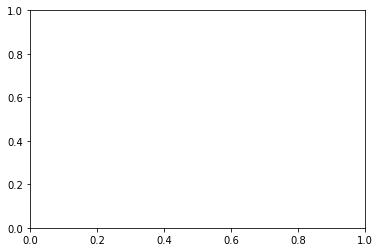

In [46]:
figure, ax = plt.subplots(1, 1)

bla = pd.cut(df[(df.strategy == 'brute_force') & df.with_low_rank & (df.max_fidelity_loss == 1.0)].entganglement, 5)

#
# for idx in range(100):
#     df[(df.id == idx) & (df.strategy == 'brute_force') & df.with_low_rank].plot('max_fidelity_loss', 'real_cnots', label=f'{df[df.id == idx].entganglement.iloc[0]}', ax=ax)
#
# figure
bla

In [53]:
max_fidelity_loss = 0.1
df[(np.abs(df.max_fidelity_loss - max_fidelity_loss) < 1e-6) & (df.strategy == 'brute_force') & (df.with_low_rank)]

,id,with_low_rank,strategy,num_qubits,depth,cnots,entganglement,entganglement (MW),max_fidelity_loss,total_saved_cnots,...,real_depth,real_depth_no_approx,real_fidelity_loss,real_fidelity_loss_benchmark,duration,approximation_miscalculation,real_approximation_miscalculation,benchmark_fidelity_loss_fail,saved_cnots_miscalculation,real_cnots_norm
2,0,True,brute_force,7,35,151,0.844138,0.959305,0.1,-2,...,469,363,-0.0000,-0.0,3.818133,False,False,False,False,1.013245
42,1,True,brute_force,7,35,151,0.882917,0.975531,0.1,-2,...,469,363,-0.0000,-0.0,3.769107,False,False,False,False,1.013245
82,2,True,brute_force,7,35,151,0.835414,0.965294,0.1,67,...,221,363,0.1797,-0.0,2.448992,False,True,False,False,0.556291
122,3,True,brute_force,7,35,151,0.740149,0.916891,0.1,67,...,220,360,0.1441,-0.0,2.532398,False,True,False,False,0.560000
162,4,True,brute_force,7,35,151,0.826722,0.964107,0.1,-2,...,469,363,-0.0000,-0.0,5.846590,False,False,False,False,1.013245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,95,True,brute_force,7,35,151,0.794966,0.902571,0.1,67,...,221,363,0.1549,-0.0,2.006069,False,True,False,False,0.556291
3842,96,True,brute_force,7,35,151,0.861318,0.972230,0.1,-2,...,469,363,-0.0000,-0.0,3.762711,False,False,False,False,1.013245
3882,97,True,brute_force,7,35,151,0.834563,0.947239,0.1,67,...,220,363,0.2087,-0.0,2.171688,False,True,False,False,0.556291
3922,98,True,brute_force,7,35,151,0.825701,0.972021,0.1,-2,...,469,363,-0.0000,-0.0,2.730655,False,False,False,False,1.013245


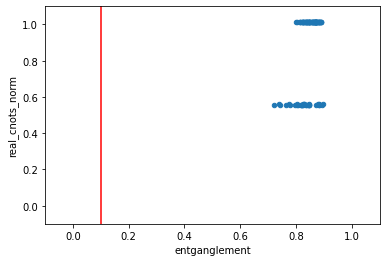

In [54]:
max_fidelity_loss = 0.1
df[(np.abs(df.max_fidelity_loss - max_fidelity_loss) < 1e-6) & (df.strategy == 'brute_force') & (df.with_low_rank)][['entganglement', 'real_cnots_norm']].plot.scatter(x=0, y=1, xlim=(-0.1,1.1), ylim=(-0.1,1.1))
plt.axvline(max_fidelity_loss, color='red')